# Convolution Neural Network(CNN)
- 합성곱층과 풀링층으로 구성
- 합성곱(Convolution): 

### 1. Download to Fashion MNIST data
- Import `tensorflow`
  - Using `keras`
    - **`keras.datasets._`**
    - **`.load_data()`**

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### 2. Create Train-set and Test-set using **`train_test_split()`**
- Import `sklearn.model_selection`
  - Using `train_test_split()`

In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

#checkout
print(train_scaled.shape)
print(val_scaled.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


### 3. Create a CNN Model
- Using `keras.Seuquential()`
- Using **`.Conv2D()`**
  - `filters`: 합성곱 필터 개수 지정
  - `kernel_size`: 필터의 커널크기 지정
  - `padding`: 입력의 패딩 타입을 지정
    - `vaild`(default): 패딩을 하지 않음
    - `same`: 합성곱 층의 출력 크기를 입력 크기와 동일하게 패딩을 추가
- **`.MaxPooling2D()`**
  - 입력의 너비와 높이를 줄이는 풀링 연산 구현 클래스
  - `pool_size=(2, 2)`: 풀링의 크기를 지정
    - 가로세로 크기가 동일하다면 정수로 입력
    - 튜플을 사용해 개별적으로 크기 지정 가능
  - `strides=None`: 풀링의 이동 간격 지정
    - 기본값은 풀링의 크기와 동일함

In [3]:
model = keras.Sequential([
  keras.layers.Conv2D(32, kernel_size=3, activation="relu", padding="same", input_shape=(28, 28, 1))  
])

In [4]:
model.add(keras.layers.MaxPooling2D(2))

### 4. Create and add a second convolutional neural network
- Using `.Flatten()`
- Using `.Dense()`
- Using `.Dropout()`

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation="relu", padding="same"))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

### 5. Schematic illustration of CNN model structure 
- `keras`
  - `.utils.plot_model()`
- `.plot_model()` params
  - `dpi=96`(default): 해상도 지정
  - `show_shapes=False`(default): 입력과 출력의 크기 표시
  - `show_layer_names=True`(default): 층 이름을 출력
  - `to_file=FILENAME.png`: 그림 파일로 저장 가능   

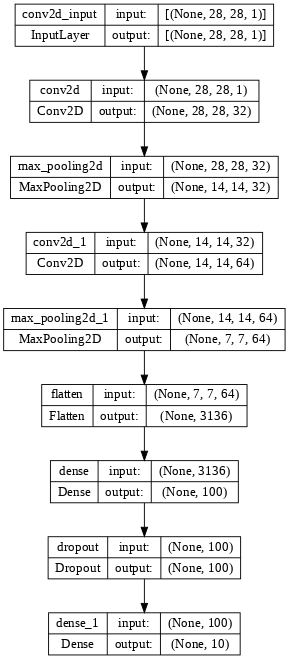

In [8]:
keras.utils.plot_model(model, dpi=66, show_shapes=True)

### 6. Training and Compile
- Using optimizers
  - `optimizer=adam`
- Using `callbacks.ModelCheckPoint()`
- Using `callbacks.EarlyStopping()`

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

#check point
checkPoint = keras.callbacks.ModelCheckpoint("best-cnn-model.h5", save_best_only=True)

#stopping
earlyStopped = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_scaled, train_target, epochs=20,
    validation_data=(val_scaled, val_target),
    callbacks=[checkPoint, earlyStopped]
  )

Epoch 1/20
1500/1500 [==============================] - 14s 4ms/step - loss: 0.5351 - accuracy: 0.8101 - val_loss: 0.3421 - val_accuracy: 0.8756
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3510 - accuracy: 0.8748 - val_loss: 0.2736 - val_accuracy: 0.9001
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3002 - accuracy: 0.8906 - val_loss: 0.2598 - val_accuracy: 0.9058
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2678 - accuracy: 0.9023 - val_loss: 0.2465 - val_accuracy: 0.9105
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2414 - accuracy: 0.9125 - val_loss: 0.2396 - val_accuracy: 0.9092
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2232 - accuracy: 0.9179 - val_loss: 0.2266 - val_accuracy: 0.9172
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2057 - accuracy: 0.9242 - val_loss: 0.2330 - val_accuracy

### 7. Visualize loss graph
- Import `matplotlib.pyplot`
  - Using `.plot`
  - Using `.legend()`

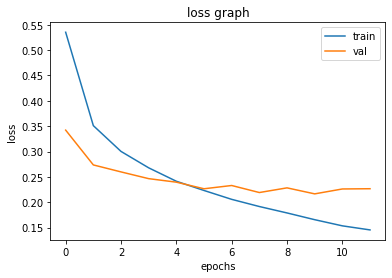

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("loss graph")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

### 8. Validation-Set Evaluation
- Using `.evaluate()`

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2165 - accuracy: 0.9237


[0.2165067344903946, 0.9236666560173035]

### 9. Predict for new data
- Using `.imshow()`
- Using `.predict()`
- Using index slicing


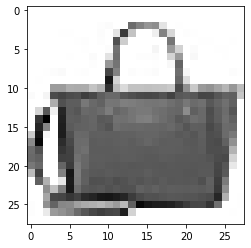

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap="gray_r")

In [13]:
predicts = model.predict(val_scaled[0:1])
print(predicts)

1/1 [==============================] - 0s 126ms/step
[[7.3018108e-20 8.5167161e-26 2.3890040e-22 4.3279085e-22 5.4149343e-20
  8.0860453e-18 5.7164583e-18 4.2318755e-24 1.0000000e+00 3.6865155e-19]]


> keras `fit(), predict(), evaluate()` 메소드는 입력의 첫 번째 차원이 배치 차원일 것을 기대하기 때문에 (28, 28, 1)차원이 아닌 (1, 28, 28, 1)차원으로 전달

### 10. Visualize predict graph
- Using `.bar()`

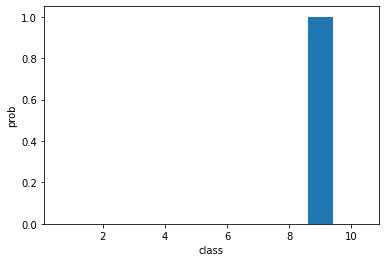

In [14]:
#predict graph
plt.bar(range(1, 11), predicts[0])
plt.xlabel("class")
plt.ylabel("prob")
plt.show()

### 11. Customize answers to data
- 정답 레이어에 해당하는 배열을 정의해 데이터에 대한 정답을 사용자화 

In [15]:
classes = [
    "티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클 부츠"
  ]

import numpy as np
print(classes[np.argmax(predicts)])

가방


### 12. Compare validation set evaluation and training set evaluation
- Using `.evaluate()`

In [16]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2442 - accuracy: 0.9150


[0.24420811235904694, 0.9150000214576721]

In [17]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2165 - accuracy: 0.9237


[0.2165067344903946, 0.9236666560173035]

> 검증 세트의 성능보다 훈련 세트의 성능이 약간 낮은 것을 확인할 수 있고, 실제 모델을 사용하게 된다면 약 91% 성능을 보일 수 있다고 예측이 가능함